## Load a  previously trained doc2vec model

The model was trained using gensim with the following parameters

In [18]:
import umap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Doc2Vec

%matplotlib inline

In [20]:
model = Doc2Vec.load('imdb.d2v')

## As a test case we are only going to take the training set of positive and negative documents

In [21]:
positive_examples = []
negative_examples = []
for i, x in enumerate(model.docvecs.doctags):
    if x.startswith('TRAIN_POS'):
        positive_examples.append(model.docvecs[i])
    if x.startswith('TRAIN_NEG'):
        negative_examples.append(model.docvecs[i])

In [42]:
pos = pd.DataFrame(positive_examples)
pos.insert(loc=0, column='sentiment', value=1)

neg = pd.DataFrame(negative_examples)
neg.insert(loc=0, column='sentiment', value=0)
reviews = pd.concat([pos, neg], ignore_index=True)

### Let's try to embed the documents which are embedded into a 100 dimensional space into a two dimensional space

In [38]:
%%time
review_array = np.array(reviews.iloc[:, 1:])
review_embedding = umap.UMAP().fit_transform(review_array)

CPU times: user 6min 19s, sys: 968 ms, total: 6min 20s
Wall time: 4min 46s


In [43]:
df = pd.DataFrame(review_embedding, columns=['x', 'y'])
df['labels'] = reviews['sentiment']

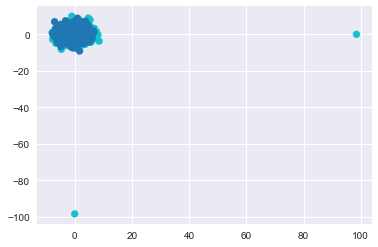

In [44]:
plt.scatter(x=df['x'], y=df['y'], c=df['labels'], cmap='tab10')

This doesn't look great. Let's try decreasing the size of the local neighborhood and increasing min_dist

In [51]:
%%time
tweaked_embedding = umap.UMAP(n_neighbors=10, min_dist=1.0).fit_transform(review_array)

CPU times: user 4min 24s, sys: 364 ms, total: 4min 24s
Wall time: 3min 28s


In [53]:
df2 = pd.DataFrame(tweaked_embedding, columns=['x', 'y'])
df2['labels'] = reviews['sentiment']

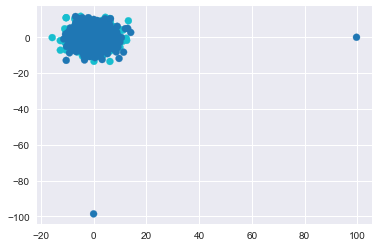

In [55]:
plt.scatter(x=df2['x'], y=df2['y'], 
            c=df2['labels'], cmap='tab10')

It still looks basically the same. If we zoom in (to ignore the outlying points) we see

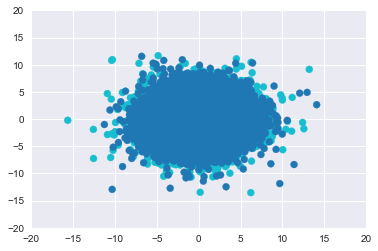

In [56]:
plt.axis([-20, 20, -20, 20])
plt.scatter(x=df2['x'], y=df2['y'], c=df2['labels'], cmap='tab10')